In [59]:
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datetime import datetime

In [3]:
start=datetime(2017,1,1)
end=datetime(2021,1,1)

In [4]:
goldman=web.DataReader("GS","yahoo",start,end)
morganstanley=web.DataReader("MS","yahoo",start,end)
jpmorgan=web.DataReader("JPM","yahoo",start,end)

In [5]:
df=pd.DataFrame()
for i in [goldman,morganstanley,jpmorgan]:
    df=pd.concat([df,i.Open],axis=1)

In [6]:
df.columns="Goldman Sachs,Morgan Stanley,J.P.Morgan Chase".split(",")

Text(0, 0.5, 'Price')

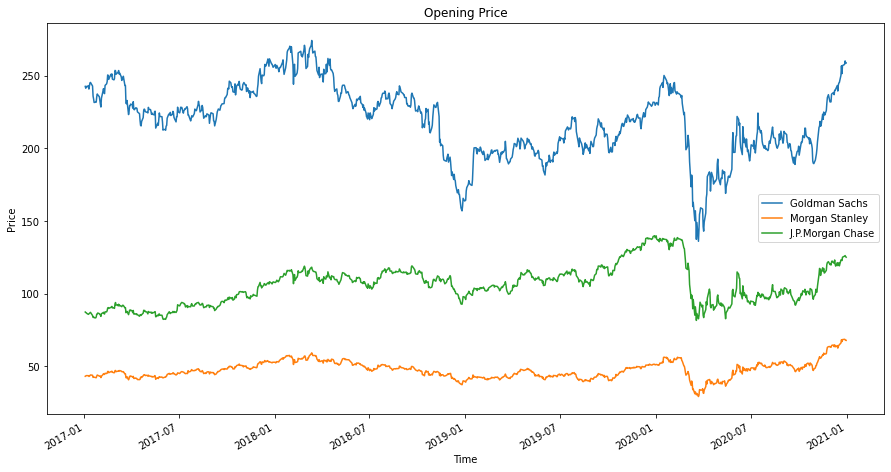

In [7]:
df.plot(figsize=(15,8),title="Opening Price")
plt.xlabel("Time")
plt.ylabel("Price")

In [8]:
df=pd.DataFrame()
for i in [goldman,morganstanley,jpmorgan]:
    df=pd.concat([df,i.Volume],axis=1)
print(df)

               Volume      Volume      Volume
2017-01-03  4384200.0   8316900.0  20550700.0
2017-01-04  2728700.0   7747400.0  15266600.0
2017-01-05  3562600.0   9883200.0  14300800.0
2017-01-06  3591100.0   9152800.0  12893300.0
2017-01-09  3022800.0  11104000.0  12806600.0
...               ...         ...         ...
2020-12-24   968100.0   3126700.0   4164900.0
2020-12-28  2793400.0   7417100.0   8072600.0
2020-12-29  1430900.0   4701300.0   8389200.0
2020-12-30  1566500.0   5283200.0   7398000.0
2020-12-31  2043100.0   5297400.0   8580200.0

[1007 rows x 3 columns]


Text(0, 0.5, 'Volume')

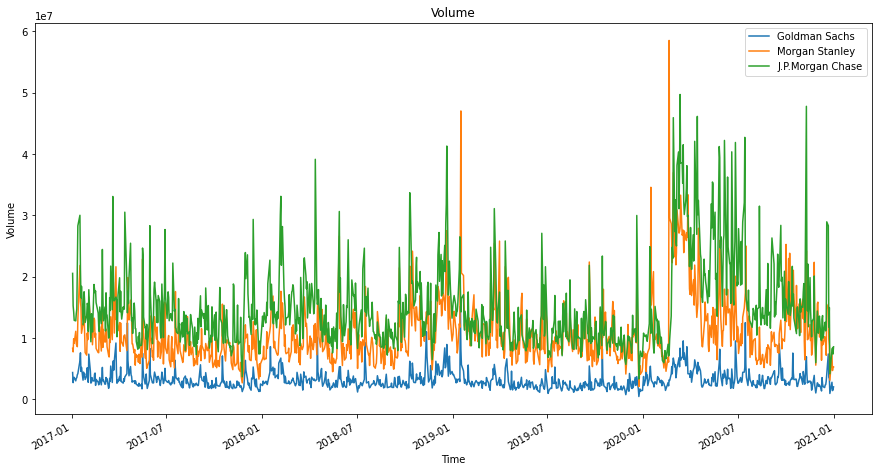

In [9]:
df.columns="Goldman Sachs,Morgan Stanley,J.P.Morgan Chase".split(",")
df.plot(figsize=(15,8),title="Volume")
plt.xlabel("Time")
plt.ylabel("Volume")

In [10]:
morganstanley.Volume.idxmax()

Timestamp('2020-02-20 00:00:00')

In [11]:
for i in [goldman,morganstanley,jpmorgan]:
    i["Total Traded"]=i.Open*i.Volume

In [12]:
df=pd.DataFrame()
for i in  [goldman,morganstanley,jpmorgan]:
    df=pd.concat([df,i["Total Traded"]],axis=1)

print(df)
df.columns="Goldman Sachs,Morgan Stanley,J.P.Morgan Chase".split(",")

            Total Traded  Total Traded  Total Traded
2017-01-03  1.064045e+09  3.583752e+08  1.794898e+09
2017-01-04  6.588173e+08  3.354624e+08  1.327584e+09
2017-01-05  8.647143e+08  4.302157e+08  1.241452e+09
2017-01-06  8.700876e+08  3.986960e+08  1.113852e+09
2017-01-09  7.352961e+08  4.829130e+08  1.097910e+09
...                  ...           ...           ...
2020-12-24  2.488404e+08  2.137412e+08  5.209873e+08
2020-12-28  7.201664e+08  5.085164e+08  1.015695e+09
2020-12-29  3.724060e+08  3.211458e+08  1.058717e+09
2020-12-30  4.054259e+08  3.583595e+08  9.283750e+08
2020-12-31  5.287543e+08  3.591637e+08  1.073297e+09

[1007 rows x 3 columns]


<AxesSubplot:>

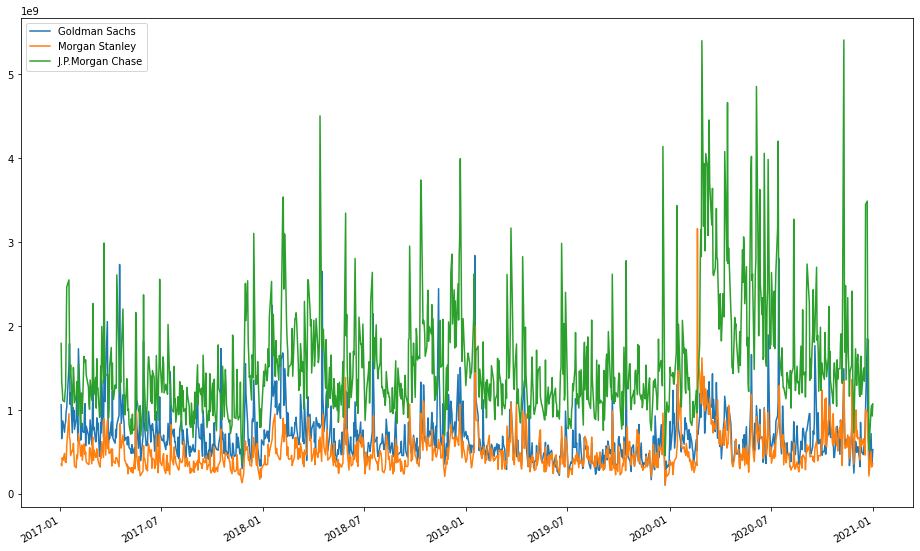

In [13]:
df.plot(figsize=(16,10))

In [14]:
jpmorgan["Total Traded"].idxmax()

Timestamp('2020-11-09 00:00:00')

In [21]:
goldman["Open MA50"]=goldman.rolling(50).mean()["Open"]
goldman["Open MA200"]=goldman.rolling(200).mean()["Open"]

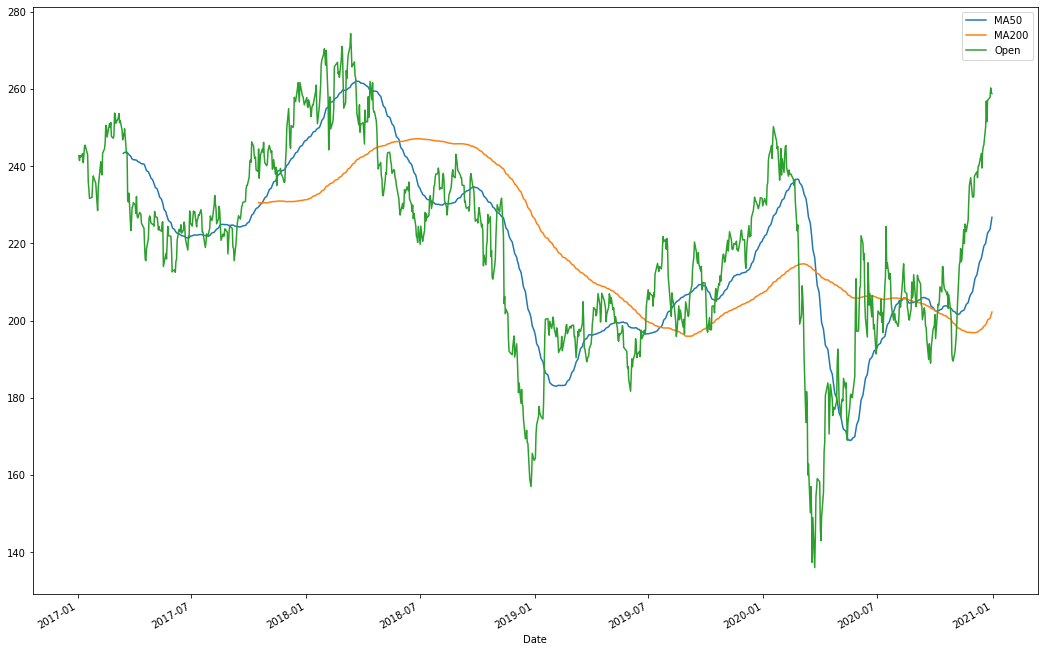

In [26]:
goldman.rolling(50).mean()["Open"].plot(label="MA50")
goldman.rolling(200).mean()["Open"].plot(label="MA200")
goldman["Open"].plot(figsize=(18,12))
plt.legend()

In [33]:
from pandas.plotting import scatter_matrix
ib_composite=pd.concat([goldman.Open,morganstanley.Open,jpmorgan.Open],axis=1)
ib_composite.columns="Goldman Sachs,Morgan Stanley,J.P.Morgan Chase".split(",")
ib_composite

Goldman Sachs  Morgan Stanley  J.P.Morgan Chase
Date                                                       
2017-01-03     242.699997       43.090000         87.339996
2017-01-04     241.440002       43.299999         86.959999
2017-01-05     242.720001       43.529999         86.809998
2017-01-06     242.289993       43.560001         86.389999
2017-01-09     243.250000       43.490002         85.730003
...                   ...             ...               ...
2020-12-24     257.040009       68.360001        125.089996
2020-12-28     257.809998       68.559998        125.820000
2020-12-29     260.260010       68.309998        126.199997
2020-12-30     258.809998       67.830002        125.489998
2020-12-31     258.799988       67.800003        125.089996

[1007 rows x 3 columns]

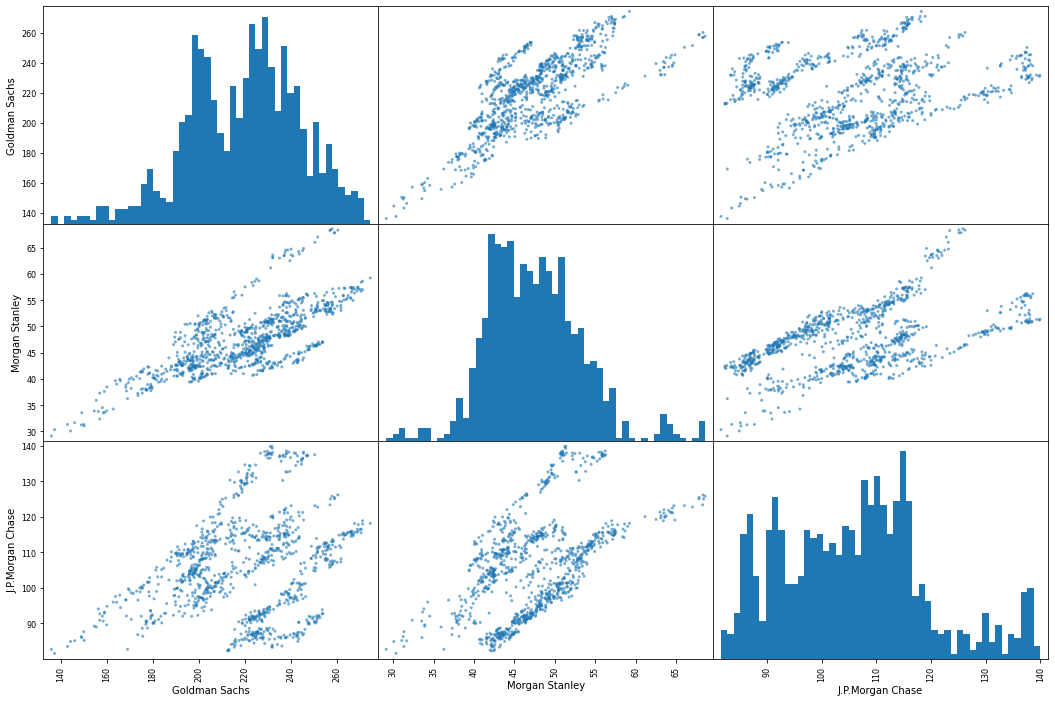

In [38]:
scatter_matrix(ib_composite,figsize=(18,12),alpha=0.6,hist_kwds={"bins":50})
plt.show()

In [44]:
def candlestick(k):
    import plotly.graph_objects as go
    figure=go.Figure(data=[go.Candlestick
                 (x=k.index,
                 open=k.Open,
                 close=k.Close,
                  high=k.High,
                  low=k.Low,
                  increasing_line_color="green",
                  decreasing_line_color="red")])
    figure.show()

candlestick(goldman)

In [50]:
for i in [goldman,morganstanley,jpmorgan]:
    candlestick(i)

In [120]:
def returns(i):
    i["Returns"]=(i.Close/i.Close.shift(1))-1
    return(i)
for i in [goldman,morganstanley,jpmorgan]:
    returns(i)

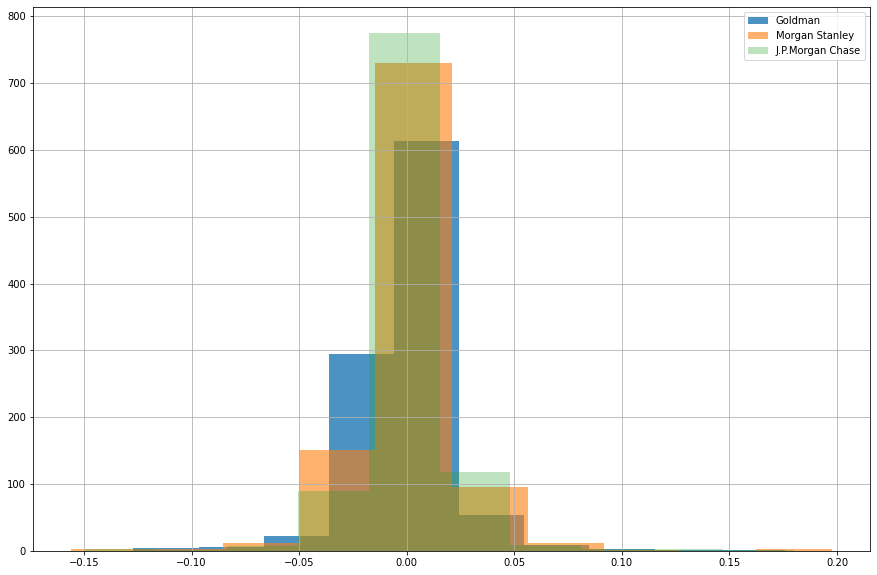

In [121]:

goldman.Returns.hist(figsize=(15,10),label="Goldman",alpha=0.8)
morganstanley.Returns.hist(label="Morgan Stanley",alpha=0.6)
jpmorgan.Returns.hist(label="J.P.Morgan Chase",alpha=0.3)
plt.legend()
plt.show()

In [122]:
jpmorgan

High         Low        Open       Close      Volume  \
Date                                                                     
2017-01-03   87.760002   85.980003   87.339996   87.230003  20550700.0   
2017-01-04   87.180000   86.400002   86.959999   86.910004  15266600.0   
2017-01-05   87.110001   85.260002   86.809998   86.110001  14300800.0   
2017-01-06   86.620003   85.940002   86.389999   86.120003  12893300.0   
2017-01-09   86.769997   85.519997   85.730003   86.180000  12806600.0   
...                ...         ...         ...         ...         ...   
2020-12-24  125.550003  123.570000  125.089996  124.519997   4164900.0   
2020-12-28  126.650002  124.790001  125.820000  125.339996   8072600.0   
2020-12-29  126.279999  124.889999  126.199997  125.010002   8389200.0   
2020-12-30  125.849998  124.900002  125.489998  125.360001   7398000.0   
2020-12-31  127.330002  124.820000  125.089996  127.070000   8580200.0   

             Adj Close  Total Traded   Returns  pct_daily_return  \
Date                                                               
2017-01-03   77.458603  1.794898e+09       NaN               NaN   
2017-01-04   77.601486  1.327584e+09 -0.003668         -0.366846   
2017-01-05   76.887154  1.241452e+09 -0.009205         -0.920496   
2017-01-06   76.896103  1.113852e+09  0.000116          0.011616   
2017-01-09   76.949669  1.097910e+09  0.000697          0.069667   
...                ...           ...       ...               ...   
2020-12-24  123.629646  5.209873e+08 -0.004398         -0.439756   
2020-12-28  124.443787  1.015695e+09  0.006585          0.658529   
2020-12-29  124.116150  1.058717e+09 -0.002633         -0.263279   
2020-12-30  124.463646  9.283750e+08  0.002800          0.279976   
2020-12-31  126.161423  1.073297e+09  0.013641          1.364071   

            daily_cumulative_return  
Date                                 
2017-01-03                      NaN  
2017-01-04                 0.996332  
2017-01-05                 0.987160  
2017-01-06                 0.987275  
2017-01-09                 0.987963  
...                             ...  
2020-12-24                 1.427490  
2020-12-28                 1.436891  
2020-12-29                 1.433108  
2020-12-30                 1.437120  
2020-12-31                 1.456724  

[1007 rows x 10 columns]

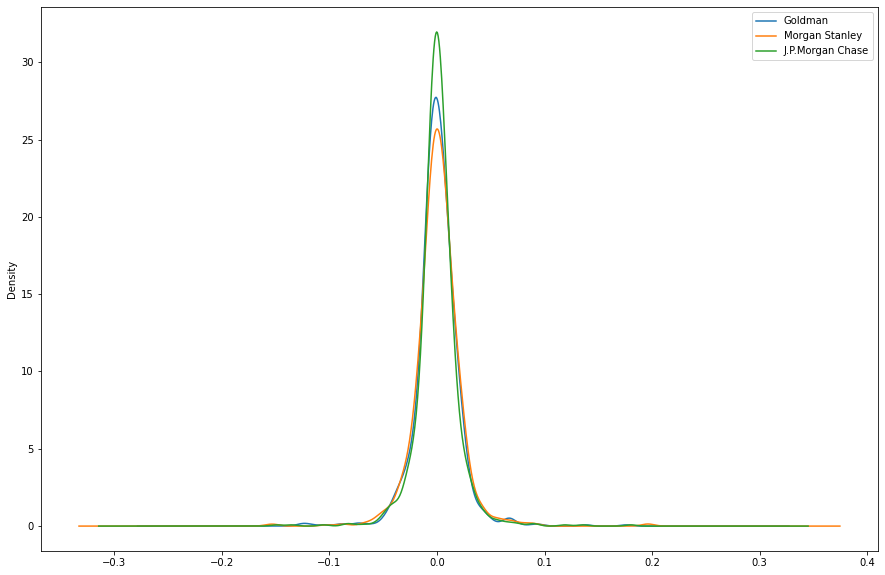

In [123]:
goldman.Returns.plot.kde(figsize=(15,10),label="Goldman")
morganstanley.Returns.plot.kde(label="Morgan Stanley")
jpmorgan.Returns.plot.kde(label="J.P.Morgan Chase")
plt.legend()
plt.show()

<AxesSubplot:>

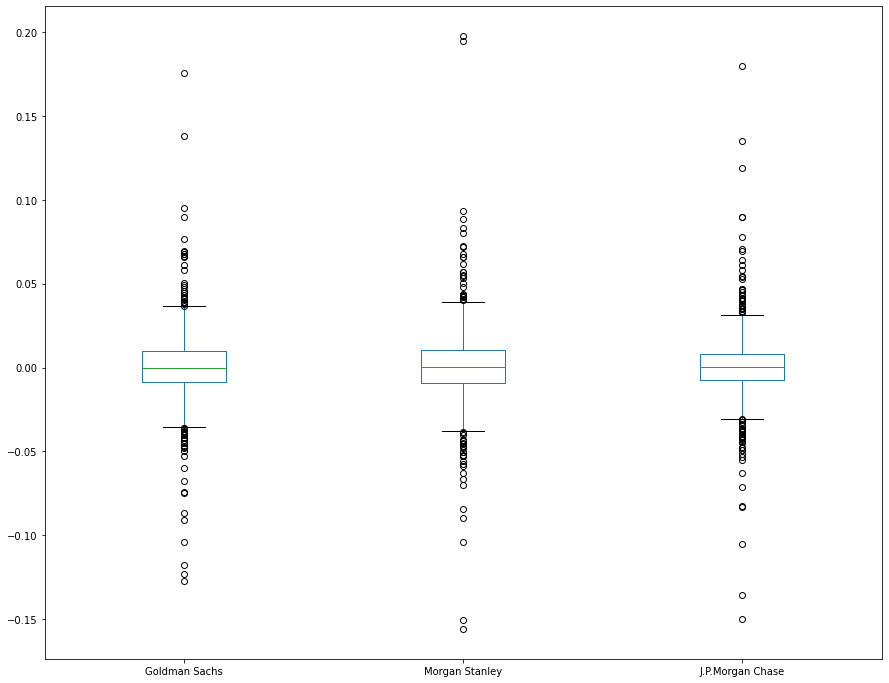

In [124]:
r_comp=pd.concat([goldman.Returns,morganstanley.Returns,jpmorgan.Returns],axis=1)
r_comp.columns="Goldman Sachs,Morgan Stanley,J.P.Morgan Chase".split(",")
r_comp.plot.box(figsize=(15,12))

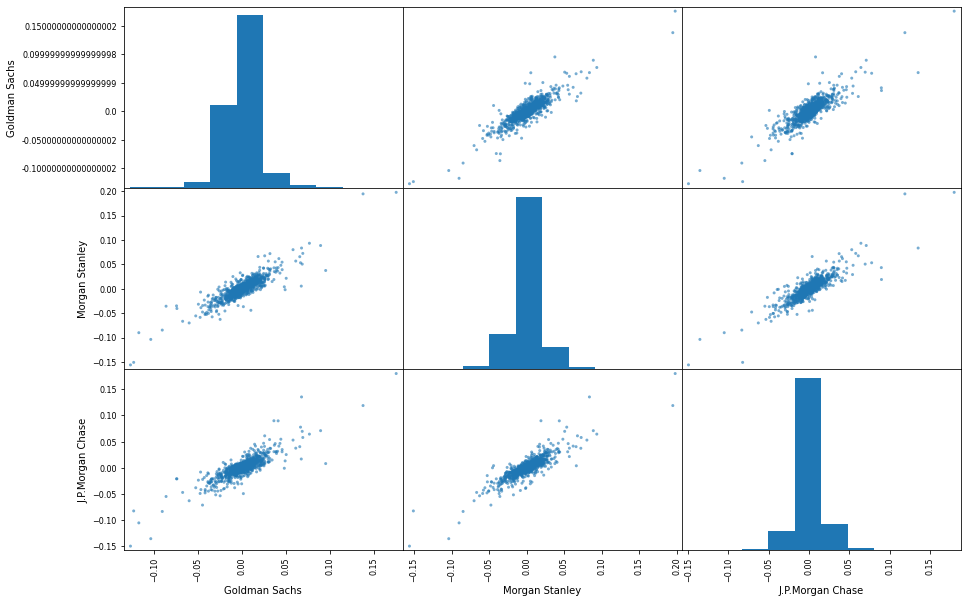

In [125]:
from pandas.plotting import scatter_matrix
scatter_matrix(r_comp,figsize=(15,10),alpha=0.6)
plt.show()

<AxesSubplot:xlabel='Goldman Sachs', ylabel='Morgan Stanley'>

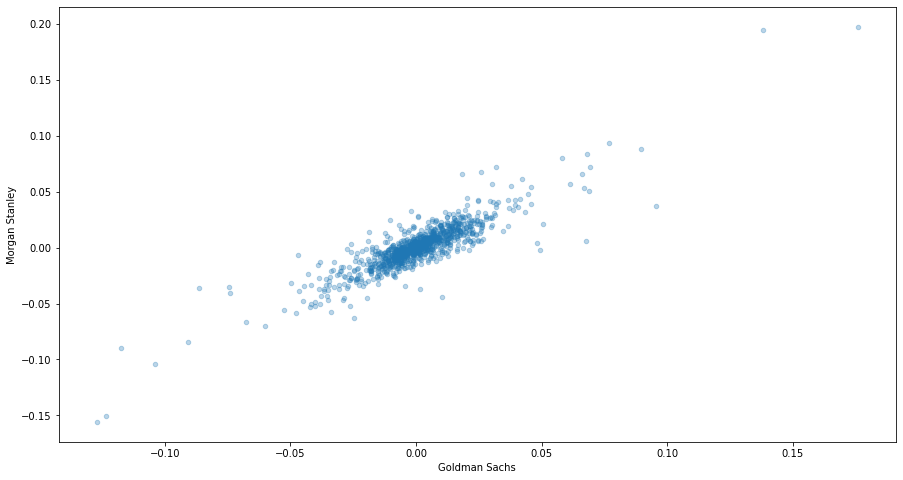

In [126]:
r_comp.plot.scatter(x="Goldman Sachs",y="Morgan Stanley",alpha=0.3,figsize=(15,8))

In [135]:
for i in [goldman,morganstanley,jpmorgan]:
    i["Cumulative_Returns"]=(1+i["Returns"]).cumprod()

morganstanley

High        Low       Open      Close      Volume  Adj Close  \
Date                                                                            
2017-01-03  43.630001  42.450001  43.090000  43.049999   8316900.0  38.775181   
2017-01-04  43.820000  43.040001  43.299999  43.619999   7747400.0  39.288589   
2017-01-05  43.630001  42.189999  43.529999  43.220001   9883200.0  38.928299   
2017-01-06  44.130001  43.180000  43.560001  43.849998   9152800.0  39.495739   
2017-01-09  43.540001  42.680000  43.490002  42.709999  11104000.0  38.468941   
...               ...        ...        ...        ...         ...        ...   
2020-12-24  68.580002  67.760002  68.360001  68.089996   3126700.0  67.741684   
2020-12-28  68.839996  67.970001  68.559998  68.050003   7417100.0  67.701897   
2020-12-29  68.489998  67.309998  68.309998  67.709999   4701300.0  67.363632   
2020-12-30  68.190002  67.570000  67.830002  67.839996   5283200.0  67.492966   
2020-12-31  68.739998  67.410004  67.800003  68.529999   5297400.0  68.179436   

            Total Traded   Returns  Cumulative_Returns  
Date                                                    
2017-01-03  3.583752e+08       NaN                 NaN  
2017-01-04  3.354624e+08  0.013240            1.013240  
2017-01-05  4.302157e+08 -0.009170            1.003949  
2017-01-06  3.986960e+08  0.014577            1.018583  
2017-01-09  4.829130e+08 -0.025998            0.992102  
...                  ...       ...                 ...  
2020-12-24  2.137412e+08 -0.001759            1.581649  
2020-12-28  5.085164e+08 -0.000587            1.580720  
2020-12-29  3.211458e+08 -0.004996            1.572822  
2020-12-30  3.583595e+08  0.001920            1.575842  
2020-12-31  3.591637e+08  0.010171            1.591870  

[1007 rows x 9 columns]

Text(0.5, 1.0, 'Cumulative Returns')

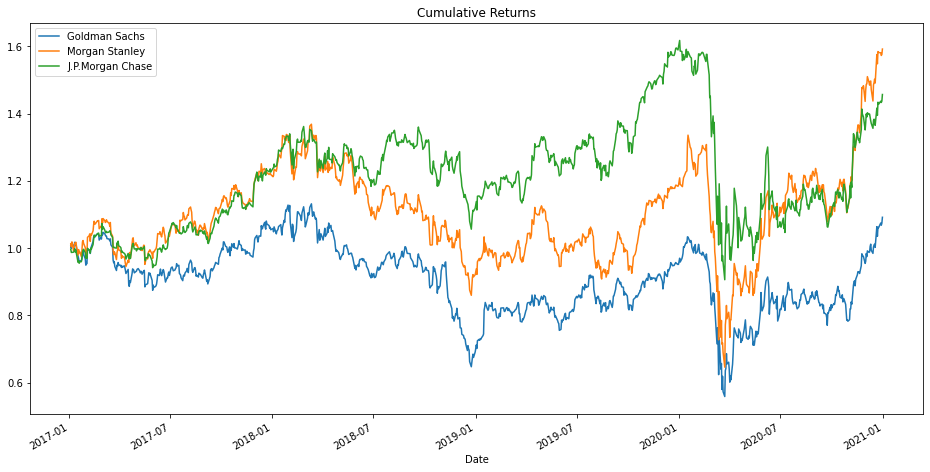

In [141]:
cr_composite=pd.concat([goldman.Cumulative_Returns,morganstanley.Cumulative_Returns,jpmorgan.Cumulative_Returns],axis=1)
cr_composite.columns="Goldman Sachs,Morgan Stanley,J.P.Morgan Chase".split(",")
cr_composite.plot(figsize=(16,8))
plt.title("Cumulative Returns")

In [145]:
for i in [goldman,morganstanley,jpmorgan]:
    i["50 MA"]=i.rolling(50).mean()["Close"]
    i["200 MA"]=i.rolling(200).mean()["Close"]

<AxesSubplot:xlabel='Date'>

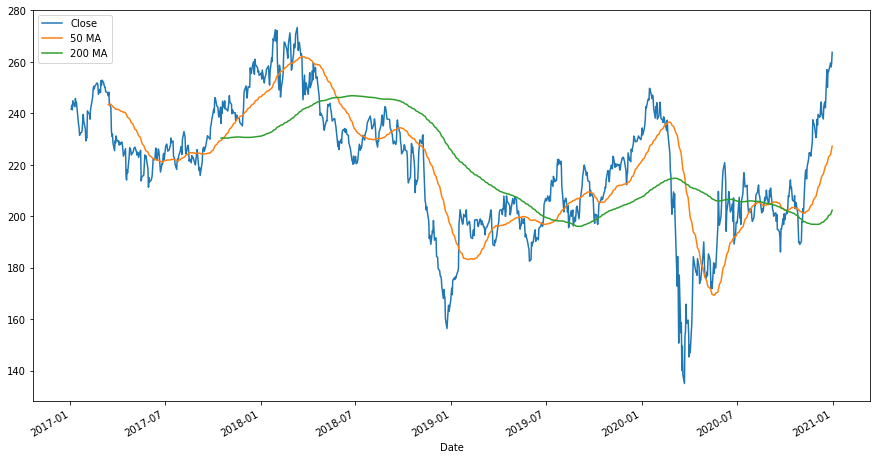

In [147]:
goldman[["Close","50 MA","200 MA"]].plot(figsize=(15,8))

<AxesSubplot:xlabel='Date'>

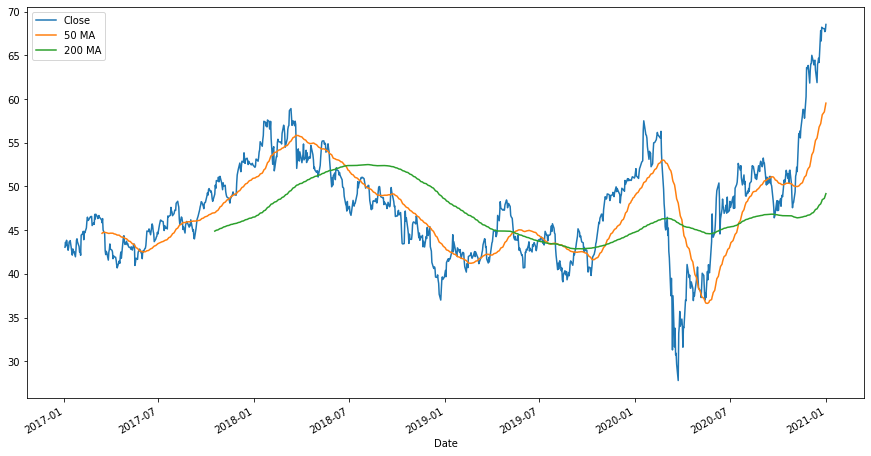

In [148]:
morganstanley[["Close","50 MA","200 MA"]].plot(figsize=(15,8))

<AxesSubplot:xlabel='Date'>

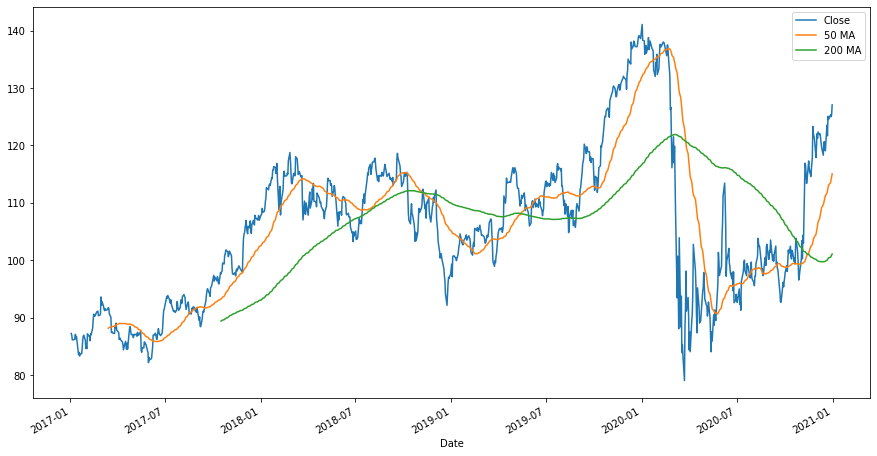

In [150]:
jpmorgan[["Close","50 MA","200 MA"]].plot(figsize=(15,8))

<AxesSubplot:xlabel='Date'>

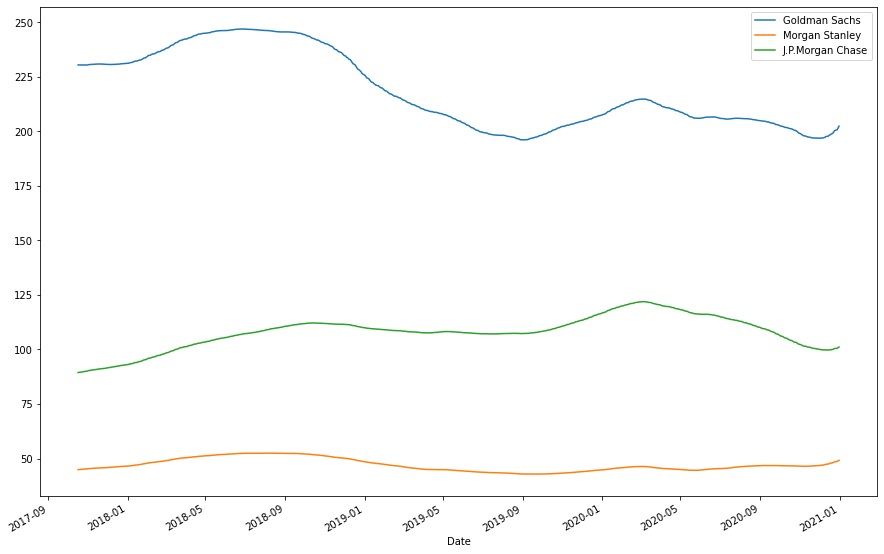

In [154]:
Close200MA_composite=pd.concat([goldman["200 MA"],morganstanley["200 MA"],jpmorgan["200 MA"]],axis=1)
Close200MA_composite.columns="Goldman Sachs,Morgan Stanley,J.P.Morgan Chase".split(",")
Close200MA_composite.plot(figsize=(15,10))